In [1]:
import numpy as np
import matplotlib.pyplot as pl
import sympy as sm

from IPython.display import display

%matplotlib qt

def ryGradient_demo(z=None):
    '''
    input: z= f(x,y)
    '''
    x,y= sm.symbols('x,y')

    if z == None:
        z= x**2 +y**2
        #z= x*(x-10)*(x+10) +y*(y-10)*(y+10)
        #z= sm.sin(x)/x+sm.sin(y)/y

    dz_dx= z.diff(x)
    dz_dy= z.diff(y)

    print(f'z= {z}')
    print(f'dz_dx= {dz_dx}')
    print(f'dz_dy= {dz_dy}')
    
    display(z)
    display(dz_dx)
    display(dz_dy)


    ϵ= 0.2

    xrange= np.arange(-10, 10+ϵ, ϵ)
    yrange= np.arange(-10, 10+ϵ, ϵ)

    xm, ym= np.meshgrid(xrange,yrange)
    zm= sm.lambdify((x,y),z)(xm,ym)

    fg= pl.figure()
    ax= pl.axes(projection='3d', 
                xlabel= 'x', 
                ylabel= 'y', 
                #title=  f'z= {z}'
                title= f'z= ${sm.latex(z)}$'
               )

    ax.contour3D(xm, ym, zm, 100, cmap='rainbow')

    #--------------------------------
    '''
    ax.plot_surface(xm,ym,zm, 
                    #rstride= 1, 
                    #cstride= 1,
                    cmap=     'rainbow', #'viridis', #'rainbow',  
                    edgecolor='none'
                   )
    '''

    #-------------------------------------------
    downSampleFactor= 5
    x0, y0, z0= np.meshgrid(
        xrange[::downSampleFactor],
        yrange[::downSampleFactor],
        np.linspace(np.min(zm), np.min(zm)+1, 1)
        )

    #dz_dx= 2*x0
    #dz_dy= 2*y0

    dz_dx_m= sm.lambdify((x,y),dz_dx)(x0,y0)
    dz_dy_m= sm.lambdify((x,y),dz_dy)(x0,y0)

    u= dz_dx_m
    v= dz_dy_m
    w= np.zeros_like(x0)
    ax.quiver(x0, y0, z0, 
              u, v, w, 
              length= 1/np.max([u,v]), 
              color = 'gray')

ryGradient_demo()


z= x**2 + y**2
dz_dx= 2*x
dz_dy= 2*y


x**2 + y**2

2*x

2*y

In [3]:
from ryPat import *
ryGradient_demo(x*y**2)


z= x*y**2
dz_dx= y**2
dz_dy= 2*x*y


z= exp(-x**2 - y**2) + exp(-(x - 10)**2 - (y - 10)**2) + exp(-(x - 5)**2 - (y - 5)**2) + exp(-(x - 4)**2 - (y + 8)**2) + exp(-(x - 2)**2 - (y - 2)**2) + exp(-(x - 2)**2 - (y + 2)**2) + exp(-(x - 1)**2 - (y - 1)**2) + exp(-(x + 3)**2 - (y - 3)**2) + exp(-(x + 8)**2 - (y - 8)**2) + exp(-(x + 8)**2 - (y + 4)**2) + exp(-(x + 10)**2 - (y + 10)**2)
dz_dx= -2*x*exp(-x**2 - y**2) + (2 - 2*x)*exp(-(x - 1)**2 - (y - 1)**2) + (4 - 2*x)*exp(-(x - 2)**2 - (y - 2)**2) + (4 - 2*x)*exp(-(x - 2)**2 - (y + 2)**2) + (8 - 2*x)*exp(-(x - 4)**2 - (y + 8)**2) + (10 - 2*x)*exp(-(x - 5)**2 - (y - 5)**2) + (20 - 2*x)*exp(-(x - 10)**2 - (y - 10)**2) + (-2*x - 20)*exp(-(x + 10)**2 - (y + 10)**2) + (-2*x - 16)*exp(-(x + 8)**2 - (y - 8)**2) + (-2*x - 16)*exp(-(x + 8)**2 - (y + 4)**2) + (-2*x - 6)*exp(-(x + 3)**2 - (y - 3)**2)
dz_dy= -2*y*exp(-x**2 - y**2) + (2 - 2*y)*exp(-(x - 1)**2 - (y - 1)**2) + (4 - 2*y)*exp(-(x - 2)**2 - (y - 2)**2) + (6 - 2*y)*exp(-(x + 3)**2 - (y - 3)**2) + (10 - 2*y)*exp(-(x - 5)**2 - (y - 

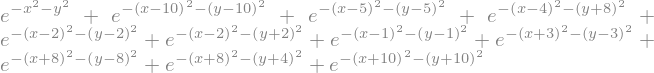

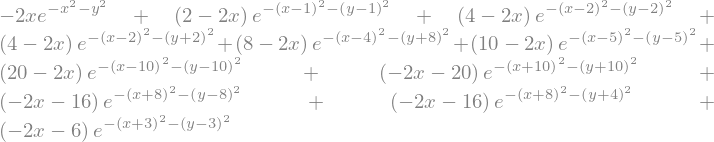

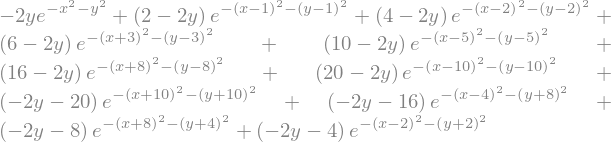

In [4]:
def f(x,y):
    z= sm.exp(-(x**2+y**2))
    return z

x,y= sm.symbols('x,y')

centerList= [(0,0),
             (1,1),
             (2,2),
             (5,5),
             (-3,3),
             (-8,8),
             (2,-2),
             (4,-8),
             (-8,-4),
             (-10,-10),
             (10,10)]

z= 0
for x0,y0 in centerList:
    z += f(x-x0, y-y0)

ryGradient_demo(z)

In [ ]:
import ryPat

In [ ]:
ryPat.ryGradient_demo()

In [ ]:
import ryPat